# Modelling sky luminance

In this tutorial, we will show how astk can be used to model sky luminance, that is how to input natural light conditions for simulating light interception

In [1]:
from alinea.astk.sky_map import sky_grid, sky_map, show_sky
from alinea.astk.meteorology.sky_luminance import sky_luminance, scale_sky_sources
from alinea.astk.meteorology.sky_irradiance import sky_irradiance
from alinea.astk.icosphere import turtle_mesh, spherical_face_centers, sky_turtle
from oawidgets.plantgl import PlantGL

## Estimate sky irradiance

By default , astk simulate one day long clear sky irradiance at Montpellier, the 21 of June 2000.
For computing sky irradiance at your location or for longer/shorter perido of time, see 'Modeling sky irradiance' companion tutorial

In [2]:
sky_irr = sky_irradiance()
sky_irr

,sun_azimuth,sun_zenith,sun_elevation,ghi,dni,dhi,ppfd
2000-06-21 07:00:00+02:00,64.964943,82.113168,7.886832,60.946465,92.041199,48.316857,148.294639
2000-06-21 08:00:00+02:00,74.426178,71.957421,18.042579,229.864545,453.118711,89.522953,504.948469
2000-06-21 09:00:00+02:00,83.866975,61.281260,28.718740,416.105120,671.771159,93.312118,873.937767
2000-06-21 10:00:00+02:00,94.061489,50.403526,39.596474,591.750512,751.066148,113.038550,1212.231017
2000-06-21 11:00:00+02:00,106.318067,39.689358,50.310642,741.184658,782.891568,138.735360,1496.174934
2000-06-21 12:00:00+02:00,123.250892,29.785355,60.214645,852.932174,778.469936,177.303988,1707.180678
2000-06-21 13:00:00+02:00,149.893038,22.213724,67.786276,918.828032,787.889552,189.415600,1831.279539
2000-06-21 14:00:00+02:00,188.216321,20.077412,69.922588,934.150316,785.467446,196.415993,1860.110781
2000-06-21 15:00:00+02:00,222.570039,24.861968,65.138032,897.808460,790.895864,180.210219,1791.714236
2000-06-21 16:00:00+02:00,244.497975,33.670653,56.329347,812.392859,781.474663,162.019789,1630.727935


## Estimate sky relative luminance

* Sky luminance is estimated from sky irradiances, using Perez all weather sky model (R. Perez, R. Seals, J. Michalsky, "All-weather model for sky luminance distribution—Preliminary configuration and validation", Solar Energy, Volume 50, Issue 3, 1993, Pages 235-245)
* Luminance is computed every steradian of the sky hemisphere
* Luminance are scaled to ensure a global horizontal irradiance of 1

In [6]:
grid=sky_grid()
lum=sky_luminance(grid, 'all_weather', sky_irr)

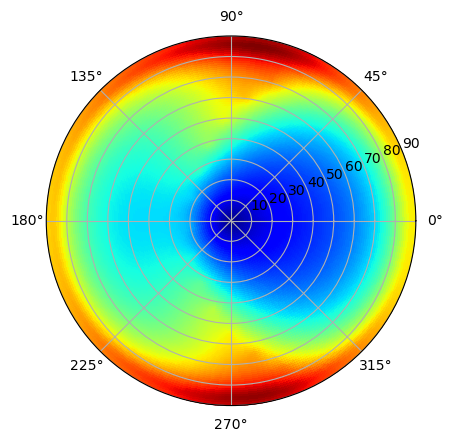

In [7]:
show_sky(grid, lum)

## Define sky discretisation

* Sky discretisation allow to split the sky in a limited number of direction for efficiency of light modelling.
* other strategies can be found in the companon tutorial

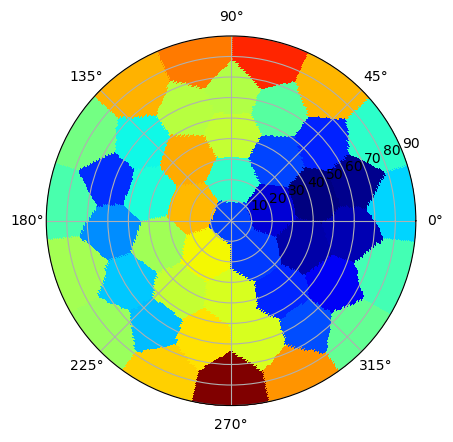

In [8]:
sky_mesh = turtle_mesh(46)
targets = spherical_face_centers(sky_mesh)
sky_sources, skymap = sky_map(grid, lum, targets)
show_sky(grid,skymap)

##  ligth sources

##### light sources are given as elevation, azimuth, relative_luminance tuples, that can be scaled to :
 * global luminance ('Wm2' [W.m-2.s-1])
 * PAR luminance ('PPFD', [micromol.m-2.s-1])
 * global luminance integrated over the time period ('MJ', [MJ.m-2])
 * PAR luminance integrated over the time-periode ('molPAR', [mol.m-2])
 Other Strategies can be found in companion tutorial

In [9]:
sky_sources = scale_sky_sources(sky_sources, sky_irr,'Wm2')

In [10]:
sky=sky_turtle(sky_mesh,sky_sources)

In [11]:
PlantGL(sky)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…